In [1]:
import pandas as pd
import numpy as np
import random

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#Classifiers
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Measures
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix

#Plots
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import matplotlib
font = {'family' : 'Times New Roman',
        'size'   : 14}

matplotlib.rc('font', **font)

# Measures

In [2]:
def feature_importance(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a Random Forest classifier
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Get feature importances from the trained model
    feature_importances = clf.feature_importances_

    # Sort indices in descending order of importance
    indices = np.argsort(feature_importances)[::-1]

    # Print feature ranking
    print("Feature ranking:")
    for f in range(len(indices)):
        if X[X.columns[f]].dtype == 'object':
            print(f"{X_train.columns[indices[f]]}: {feature_importances[indices[f]]}")
    # Plot the feature importances
    plt.figure(figsize=(10, 6))
    plt.title("Feature importances")
    plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
    plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
    plt.tight_layout()
    plt.show()

In [3]:
#-------Coverage------------
def coverage_attr(df, attribute, ground_truth):
    return df[attribute].nunique() / len(ground_truth)

In [4]:
def edit_coverage(X,step):
    X_new = X.copy()
    for i in X_new.columns:
        values = X_new[i].unique()
        if len(values) >= step:
            print(f'{i}: {values}')
            X_new[i].replace({ random.choice(values): np.nan}, inplace=True)
            X_new[i].fillna(X_new[i].mode()[0],inplace=True)

    return X_new


In [5]:
measures_steps = {
    'Coverage': [4,3,2]
}

n_steps = len(list(measures_steps.values())[0])
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}
classifier_names = list(classifiers.keys())

metrics = {
    'Accuracy': np.zeros((len(classifiers), n_steps)),
    'Precision': np.zeros((len(classifiers), n_steps)),
    'Recall': np.zeros((len(classifiers), n_steps)),
    'F1 Score': np.zeros((len(classifiers), n_steps))
}

# Dataset

In [6]:
heart_attack = pd.read_csv('dataset/heart_attack.csv')
heart_attack = heart_attack.sample(frac=1, random_state=42).reset_index(drop=True)
X = heart_attack.drop('output', axis=1)
y = heart_attack['output']
dataset_name = 'heart_attack'

In [9]:
stroke = pd.read_csv('dataset/stroke.csv').sample(frac=1).reset_index(drop=True)

X = stroke.drop(['stroke', 'id'], axis=1)
y = stroke['stroke']

enc = LabelEncoder()
for i in X.columns:
    if X[i].dtype != "object":
        X[i] = pd.cut(X[i], 4, labels=[0,1,2,3])




enc = LabelEncoder()
for i in X.columns:
    #if X[i].dtype == "object":
    X[i]=enc.fit_transform(X[i])


dataset_name = 'stroke'

In [19]:
marketing_campaign = pd.read_csv('dataset/marketing_campaign.csv',sep=';').sample(frac=1,random_state=42).reset_index(drop=True)
marketing_campaign = marketing_campaign.dropna()
marketing_campaign= marketing_campaign.reset_index(drop=True)
X = marketing_campaign.drop(['Response', 'ID', 'Dt_Customer'], axis=1)
y = marketing_campaign['Response']

enc = LabelEncoder()
for i in X.columns:
    if X[i].dtype != "object":
        X[i] = pd.cut(X[i], 4, labels=[0,1,2,3])


enc = LabelEncoder()
for i in X.columns:
    #if X[i].dtype == "object":
    X[i]=enc.fit_transform(X[i])

dataset_name = 'marketing_campaign'

In [18]:
heart_failure = pd.read_csv('dataset/heart_failure.csv')
X = heart_failure.drop(['HeartDisease'], axis=1)
y = heart_failure['HeartDisease']

enc = LabelEncoder()
for i in X.columns:
    if X[i].dtype != "object":
        X[i] = pd.cut(X[i], 4, labels=[0,1,2,3])


enc = LabelEncoder()
for i in X.columns:
    #if X[i].dtype == "object":
    X[i]=enc.fit_transform(X[i])

dataset_name = 'heart_failure'

In [15]:
airline_passenger = pd.read_csv('dataset/airline_passenger.csv')
airline_passenger.dropna(inplace=True)
airline_passenger = airline_passenger.reset_index(drop=True)

X = airline_passenger.drop(['satisfaction','Unnamed: 0','id'], axis=1)
y = airline_passenger['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1})


enc = LabelEncoder()
for i in X.columns:
    if X[i].dtype == "object":
        X[i]=enc.fit_transform(X[i])

dataset_name = 'airline_passenger'

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_new = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


measure_value = []
for k, measure_steps in enumerate(measures_steps):

    for i, step in enumerate(measures_steps.get(measure_steps)):

        X_train_new = edit_coverage(X_train_new, step)
        measure_value.append(step)
        for j, (classifier_name, classifier) in enumerate(classifiers.items()):
            # Standardize the features (optional but often recommended)
            scaler = StandardScaler()
            train_X_scaled = scaler.fit_transform(X_train_new)
            test_X_scaled = scaler.transform(X_test)

            # Train the classifier
            classifier.fit(train_X_scaled, y_train)

            # Make predictions on the fixed test set
            predictions = classifier.predict(test_X_scaled)
            # Calculate metrics and store in the metrics dictionary
            metrics['Accuracy'][j, i] = accuracy_score(y_test, predictions)
            metrics['Precision'][j, i] = precision_score(y_test, predictions, average='weighted')
            metrics['Recall'][j, i] = recall_score(y_test, predictions, average='weighted')
            metrics['F1 Score'][j, i] = f1_score(y_test, predictions, average='weighted')

Year_Birth: [3 2 1 0]
Education: [2 4 3 1 0]
Marital_Status: [5 4 2 3 1 6 7]
Recency: [2 3 0 1]
MntWines: [0 1 2 3]
MntFruits: [0 3 2 1]
MntMeatProducts: [0 1 2 3]
MntFishProducts: [0 2 3 1]
MntSweetProducts: [0 2 1 3]
MntGoldProds: [0 1 2 3]
NumDealsPurchases: [0 1 2 3]
NumStorePurchases: [0 3 1 2]
NumWebVisitsMonth: [1 0 2 3]
Year_Birth: [2. 1. 0.]
Education: [2. 4. 3. 1.]
Marital_Status: [5. 4. 2. 3. 1. 6.]
Kidhome: [1 0 2]
Teenhome: [0 1 2]
Recency: [2. 3. 1.]
MntWines: [0. 2. 3.]
MntFruits: [0. 3. 2.]
MntMeatProducts: [0. 2. 3.]
MntFishProducts: [0. 2. 1.]
MntSweetProducts: [0. 1. 3.]
MntGoldProds: [0. 1. 2.]
NumDealsPurchases: [0. 1. 3.]
NumWebPurchases: [0 1 2]
NumCatalogPurchases: [0 1 2]
NumStorePurchases: [0. 3. 2.]
NumWebVisitsMonth: [1. 0. 3.]
Year_Birth: [1. 0.]
Education: [2. 4. 1.]
Marital_Status: [5. 4. 2. 3. 6.]
Income: [0 1]
Kidhome: [1. 0.]
Teenhome: [0. 2.]
Recency: [2. 1.]
MntWines: [2. 3.]
MntFruits: [0. 3.]
MntMeatProducts: [0. 2.]
MntFishProducts: [0. 1.]
MntSwe

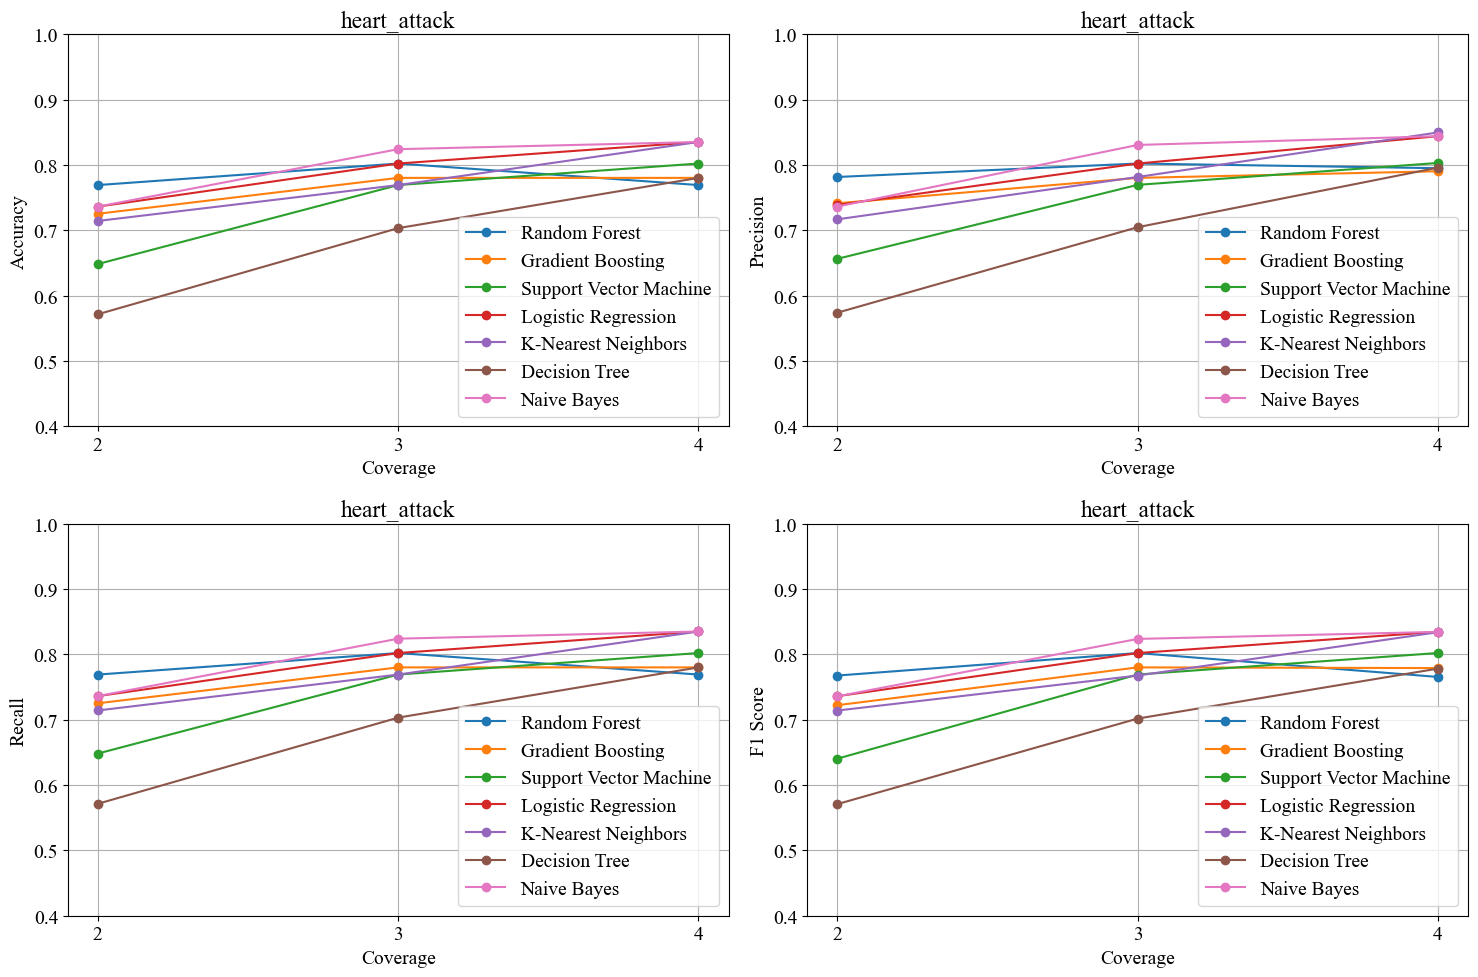

In [8]:
# Plotting
plt.figure(figsize=(15, 10))
for k, metric in metrics.items():
    plt.subplot(2, 2, list(metrics.keys()).index(k) + 1)
    for i in range(len(classifiers)):

        z = sorted(zip(measure_value,metric[i, :]))
        x=[j[0] for j in z]
        y=[j[1] for j in z]

        plt.plot(x, y, label=classifier_names[i], marker='o')
        plt.title(f'{dataset_name}')
        plt.xticks(x)
        plt.xlabel(list(measures_steps)[0])
        plt.ylabel(k)
        plt.legend()
        plt.grid(visible=True)
        plt.ylim(0.4,1)

plt.tight_layout()
plt.savefig(f'plots/coverage_{dataset_name}.svg', format='svg')
plt.show()

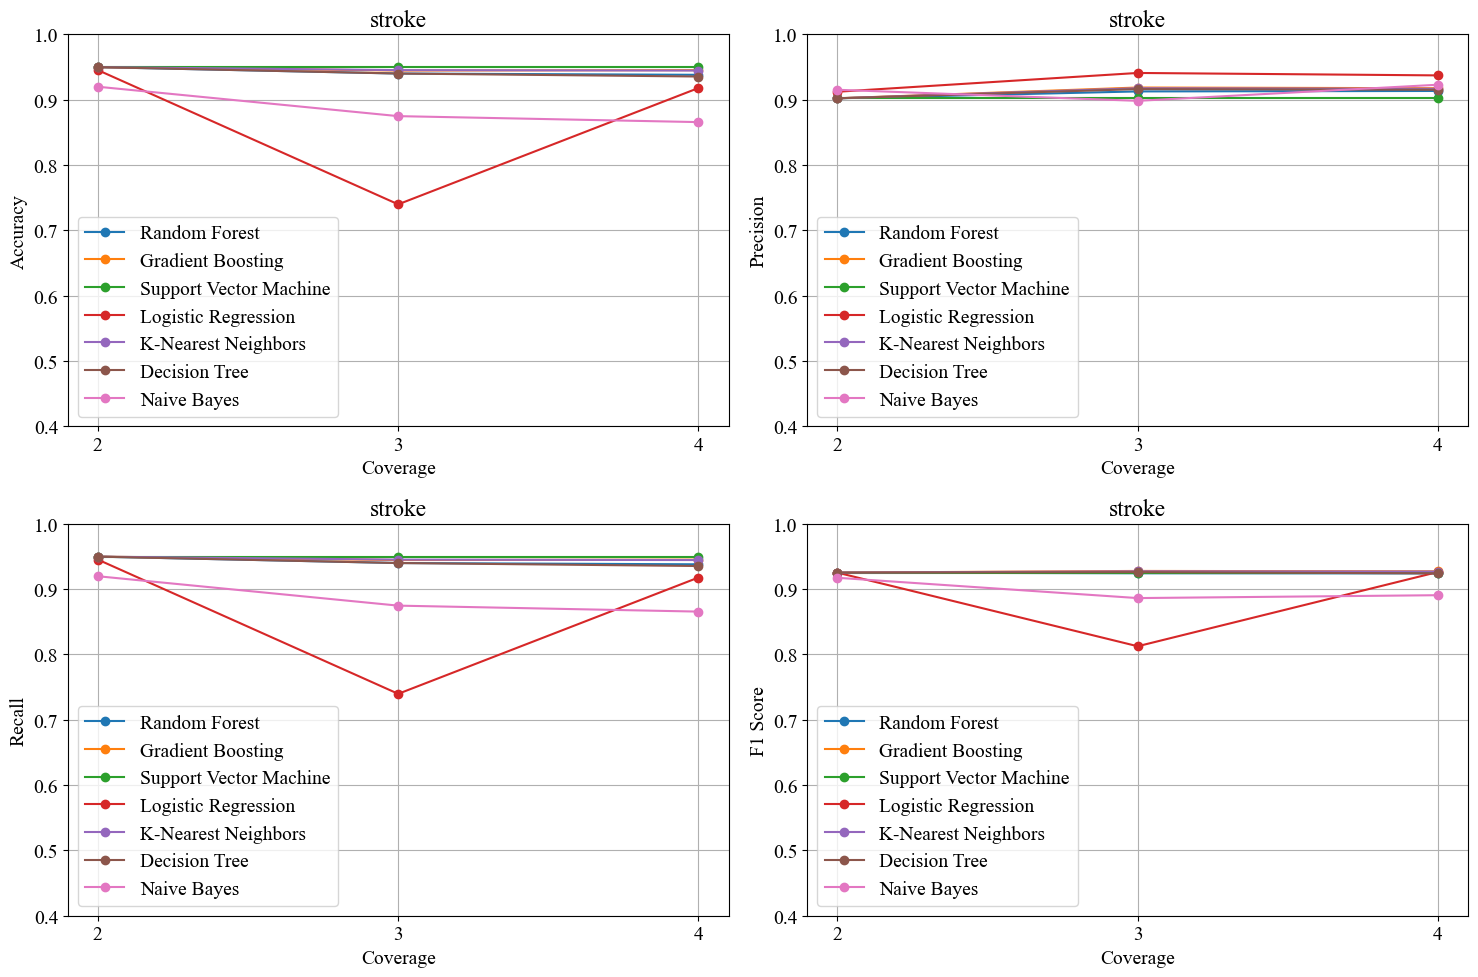

In [11]:
# Plotting
plt.figure(figsize=(15, 10))
for k, metric in metrics.items():
    plt.subplot(2, 2, list(metrics.keys()).index(k) + 1)
    for i in range(len(classifiers)):

        z = sorted(zip(measure_value,metric[i, :]))
        x=[j[0] for j in z]
        y=[j[1] for j in z]

        plt.plot(x, y, label=classifier_names[i], marker='o')
        plt.title(f'{dataset_name}')
        plt.xticks(x)
        plt.xlabel(list(measures_steps)[0])
        plt.ylabel(k)
        plt.legend()
        plt.ylim(0.4,1)
        plt.grid(visible=True)


plt.tight_layout()
plt.savefig(f'plots/coverage_{dataset_name}.svg', format='svg')
plt.show()

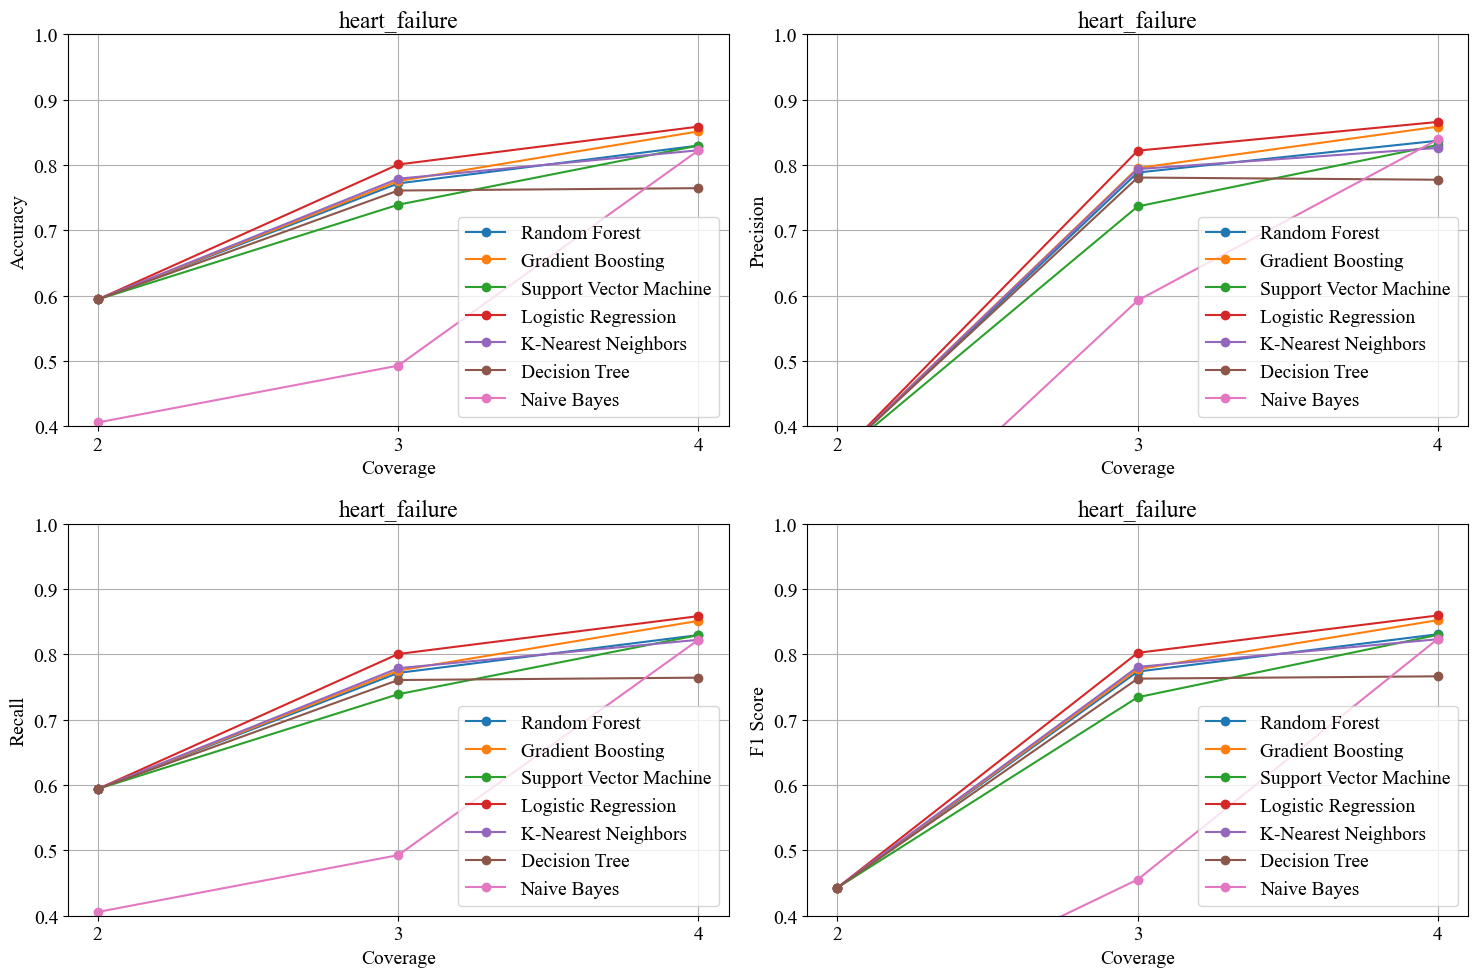

In [14]:
# Plotting
plt.figure(figsize=(15, 10))
for k, metric in metrics.items():
    plt.subplot(2, 2, list(metrics.keys()).index(k) + 1)
    for i in range(len(classifiers)):

        z = sorted(zip(measure_value,metric[i, :]))
        x=[j[0] for j in z]
        y=[j[1] for j in z]

        plt.plot(x, y, label=classifier_names[i], marker='o')
        plt.title(f'{dataset_name}')
        plt.xticks(x)
        plt.xlabel(list(measures_steps)[0])
        plt.ylabel(k)
        plt.legend()
        plt.ylim(0.4,1)
        plt.grid(visible=True)

plt.tight_layout()
plt.savefig(f'plots/coverage_{dataset_name}.svg', format='svg')
plt.show()

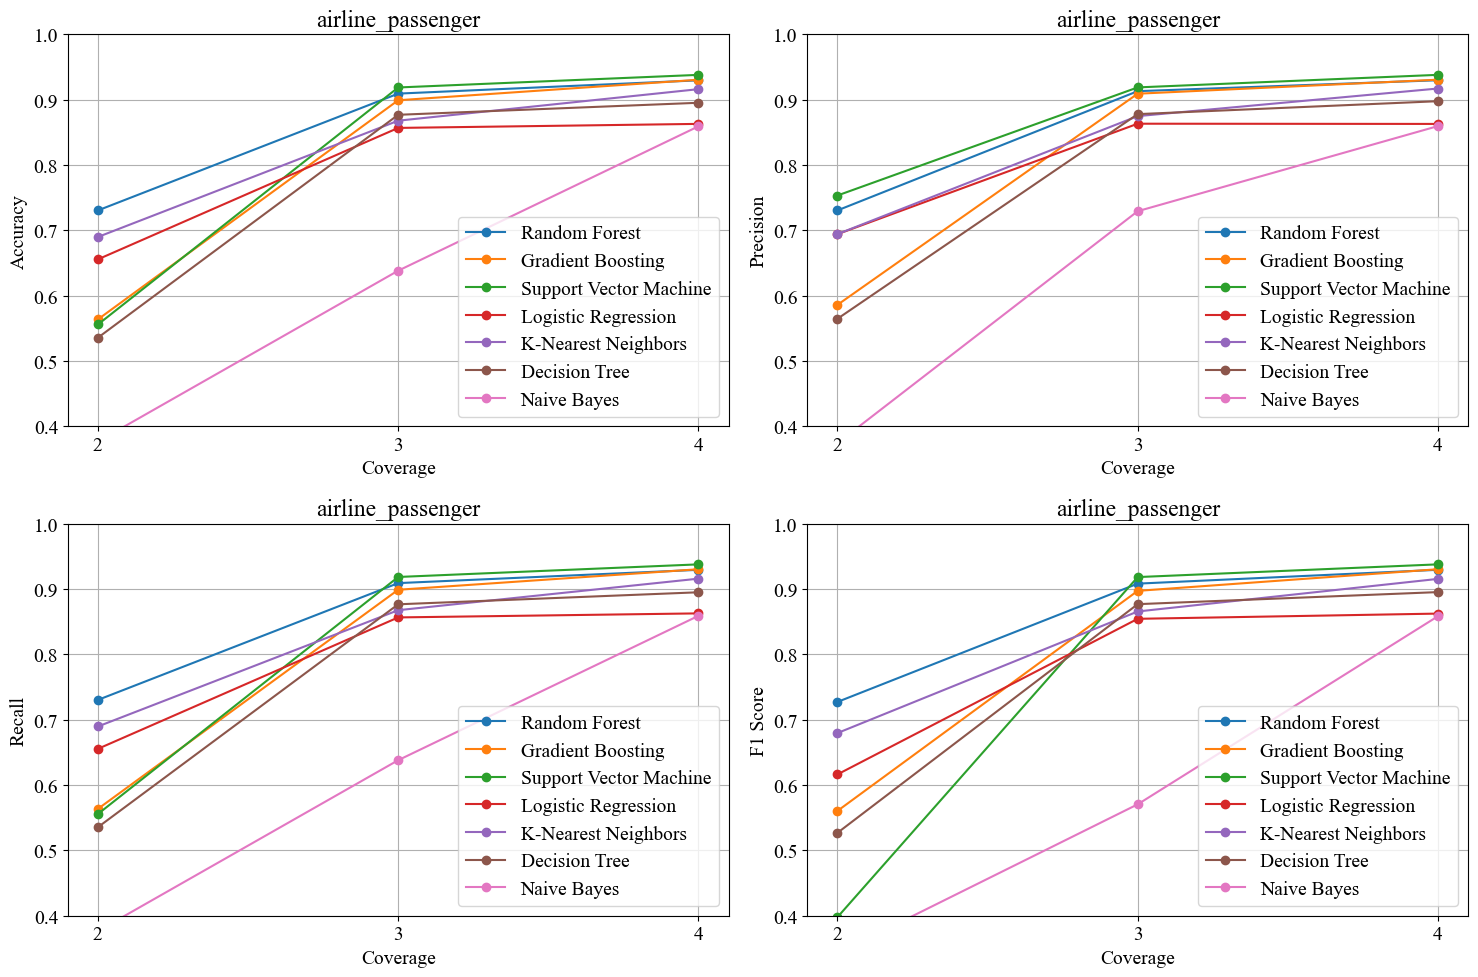

In [17]:
# Plotting
plt.figure(figsize=(15, 10))
for k, metric in metrics.items():
    plt.subplot(2, 2, list(metrics.keys()).index(k) + 1)
    for i in range(len(classifiers)):

        z = sorted(zip(measure_value,metric[i, :]))
        x=[j[0] for j in z]
        y=[j[1] for j in z]

        plt.plot(x, y, label=classifier_names[i], marker='o')
        plt.title(f'{dataset_name}')
        plt.xticks(x)
        plt.xlabel(list(measures_steps)[0])
        plt.ylabel(k)
        plt.legend()
        plt.ylim(0.4,1)
        plt.grid(visible=True)

plt.tight_layout()
plt.savefig(f'plots/coverage_{dataset_name}.svg', format='svg')
plt.show()

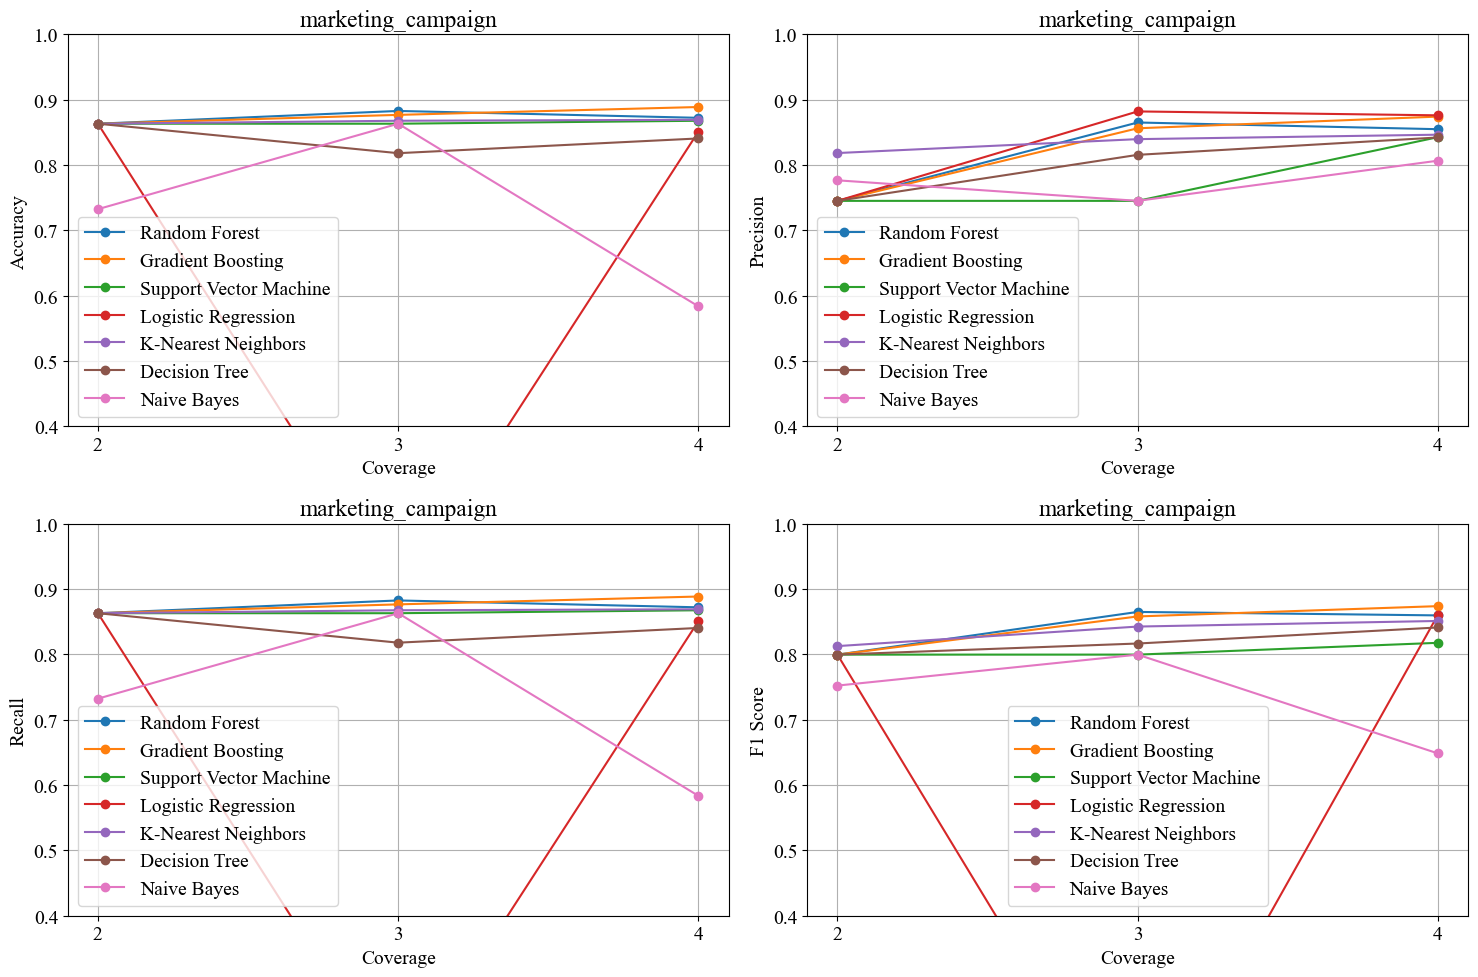

In [21]:
# Plotting
plt.figure(figsize=(15, 10))
for k, metric in metrics.items():
    plt.subplot(2, 2, list(metrics.keys()).index(k) + 1)
    for i in range(len(classifiers)):

        z = sorted(zip(measure_value,metric[i, :]))
        x=[j[0] for j in z]
        y=[j[1] for j in z]

        plt.plot(x, y, label=classifier_names[i], marker='o')
        plt.title(f'{dataset_name}')
        plt.xticks(x)
        plt.xlabel(list(measures_steps)[0])
        plt.ylabel(k)
        plt.legend()
        plt.ylim(0.4,1)
        plt.grid(visible=True)

plt.tight_layout()
plt.savefig(f'plots/coverage_{dataset_name}.svg', format='svg')
plt.show()
